In [171]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/runchentao/Desktop/CMPE 188 Team Project/classification_input.csv')
data

,Unnamed: 0,0,1,2,3,4,5
0,0,DATE,PARTICULARS,Memo,WITHDRAW,DEPOSIT,BALANCE
1,1,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,319.08
2,2,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,219.08
3,3,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,119.08
4,4,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,19.08
...,...,...,...,...,...,...,...
56,33,23-Jan-19,Chase ATM,ATM Deposit,0,100.00,"5,400.00"
57,34,23-Jan-19,Chase ATM,ATM Deposit,0,100.00,"5,500.00"
58,35,23-Jan-19,Chase ATM,ATM Deposit,0,100.00,"5,600.00"
59,36,23-Jan-19,Chase ATM,ATM Deposit,0,100.00,"5,700.00"


In [172]:
data.fillna("", inplace= True)
data.columns = ['Transation_ID', 'Category', 'Type', 'Memo' , 'Withdraw', 'Deposit', 'Balance']
data = data.drop(0)
data

,Transation_ID,Category,Type,Memo,Withdraw,Deposit,Balance
1,1,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,319.08
2,2,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,219.08
3,3,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,119.08
4,4,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,19.08
5,5,2-Jan-19,Salary,Income payment,0,"10,103.66","10,122.74"
6,6,2-Jan-19,Chase ATM,ATM Withdrawal,100,0,"10,022.74"
7,7,2-Jan-19,Chase ATM,ATM Withdrawal,100,0,"9,922.74"
8,8,3-Jan-19,Shopping,Amazon Order,"9,500.00",0,422.74
9,9,7-Jan-19,Salary,Payroll Income,0,"6,490.89","6,913.63"
10,10,7-Jan-19,Shopping,eBay Online,"6,000.00",0,913.63


In [173]:
data.to_csv('fraud_detection_input.csv')

In [174]:
col = ['Type', 'Memo']
df = data[col]
df.columns=['Category', 'Memo']
df

,Category,Memo
1,Chase ATM,ATM Withdrawal
2,Chase ATM,ATM Withdrawal
3,Chase ATM,ATM Withdrawal
4,Chase ATM,ATM Withdrawal
5,Salary,Income payment
6,Chase ATM,ATM Withdrawal
7,Chase ATM,ATM Withdrawal
8,Shopping,Amazon Order
9,Salary,Payroll Income
10,Shopping,eBay Online


In [175]:
df.insert(2, 'category_id', df['Category'].factorize()[0])
df

,Category,Memo,category_id
1,Chase ATM,ATM Withdrawal,0
2,Chase ATM,ATM Withdrawal,0
3,Chase ATM,ATM Withdrawal,0
4,Chase ATM,ATM Withdrawal,0
5,Salary,Income payment,1
6,Chase ATM,ATM Withdrawal,0
7,Chase ATM,ATM Withdrawal,0
8,Shopping,Amazon Order,2
9,Salary,Payroll Income,1
10,Shopping,eBay Online,2


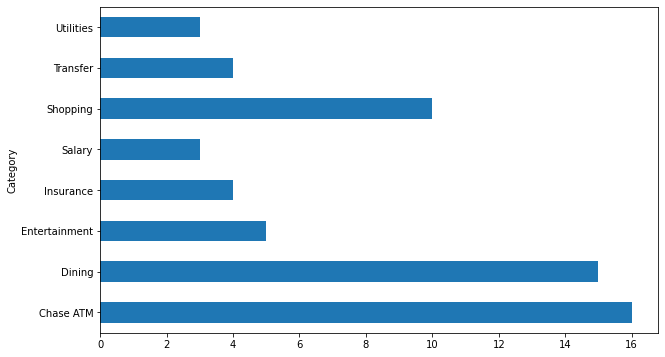

In [176]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df.groupby('Category').Memo.count().plot.barh(ylim=0)
plt.show()

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Memo).toarray()
labels = df.category_id
features.shape

(60, 101)

In [178]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Chase ATM':
  . Most correlated unigrams:
. deposit
. atm
  . Most correlated bigrams:
. atm withdrawal
. atm deposit
# 'Dining':
  . Most correlated unigrams:
. burger
. restaurant
  . Most correlated bigrams:
. atm deposit
. chinese restaurant
# 'Insurance':
  . Most correlated unigrams:
. car
. insurance
  . Most correlated bigrams:
. aaa insurance
. geico insurance
# 'Salary':
  . Most correlated unigrams:
. paycheck
. income
  . Most correlated bigrams:
. paycheck income
. income payment
# 'Shopping':
  . Most correlated unigrams:
. online
. store
  . Most correlated bigrams:
. amazon order
. online store


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Memo'], df['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [185]:
print(clf.predict(count_vect.transform(["Nike Store"])))

['Shopping']


In [181]:
print(clf.predict(count_vect.transform(["Amazon prime now"])))

['Shopping']


In [182]:
print(clf.predict(count_vect.transform(["ATM withdrawal"])))

['Chase ATM']


In [192]:
print(clf.predict(count_vect.transform(["Outgoing Transfer"])))

['Transfer']
